# Imports

In [1]:
%run ./imports.py

In [166]:
df=pd.read_csv('./BDForecasting_V2/BaseVertical_V4.csv')
df.head()

Unnamed: 0                    SITE                DATES  OCCUPANCY_COUNT
0           0  S&C-PAD: REExecSvcs-PU  2018-01-01 01:00:00                0
1           1  S&C-PAD: REExecSvcs-PU  2018-01-01 02:00:00                0
2           2  S&C-PAD: REExecSvcs-PU  2018-01-01 03:00:00                0
3           3  S&C-PAD: REExecSvcs-PU  2018-01-01 04:00:00                0
4           4  S&C-PAD: REExecSvcs-PU  2018-01-01 05:00:00                0

In [167]:
#remove weekends
'''
weekdays = df['DATES'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').weekday())
condition = weekdays.apply(lambda x: True if (x<5) else False)
df = df[condition]
'''

In [168]:
df.drop(["SITE"], axis = 1, inplace = True)
df.head()

Unnamed: 0                DATES  OCCUPANCY_COUNT
0           0  2018-01-01 01:00:00                0
1           1  2018-01-01 02:00:00                0
2           2  2018-01-01 03:00:00                0
3           3  2018-01-01 04:00:00                0
4           4  2018-01-01 05:00:00                0

This line converts the dataset from horizontal to vertical 

# redindexar

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929424 entries, 0 to 2697255
Data columns (total 3 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Unnamed: 0       int64 
 1   DATES            object
 2   OCCUPANCY_COUNT  int64 
dtypes: int64(2), object(1)
memory usage: 58.9+ MB


In [170]:
df=df.groupby(['DATES']).sum()
df

Unnamed: 0  OCCUPANCY_COUNT
DATES                                           
2018-01-01 01:00:00           0                3
2018-01-01 02:00:00         107                2
2018-01-01 03:00:00         214                3
2018-01-01 04:00:00         321                3
2018-01-01 05:00:00         428                3
...                         ...              ...
2020-12-31 19:00:00     2696721              212
2020-12-31 20:00:00     2696828              190
2020-12-31 21:00:00     2696935              153
2020-12-31 22:00:00     2697042               91
2020-12-31 23:00:00     2697149               34

[18032 rows x 2 columns]

In [171]:
df=df[['OCCUPANCY_COUNT']]
df.head()

OCCUPANCY_COUNT
DATES                               
2018-01-01 01:00:00                3
2018-01-01 02:00:00                2
2018-01-01 03:00:00                3
2018-01-01 04:00:00                3
2018-01-01 05:00:00                3

# Initial exploration

In [87]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 25208 entries, 2018-01-01 01:00:00 to 2020-12-31 23:00:00
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   OCCUPANCY_COUNT  25208 non-null  int64
dtypes: int64(1)
memory usage: 393.9+ KB


In [73]:
df.isna().sum()

OCCUPANCY_COUNT    0
dtype: int64

In [74]:
df.isnull().sum()

OCCUPANCY_COUNT    0
dtype: int64

# Numeric variables

In [75]:
# name of numeric columns
numeric_variables = df._get_numeric_data().columns.values
numeric_variables

array(['OCCUPANCY_COUNT'], dtype=object)

In [76]:
numeric_variables.shape[0]

1

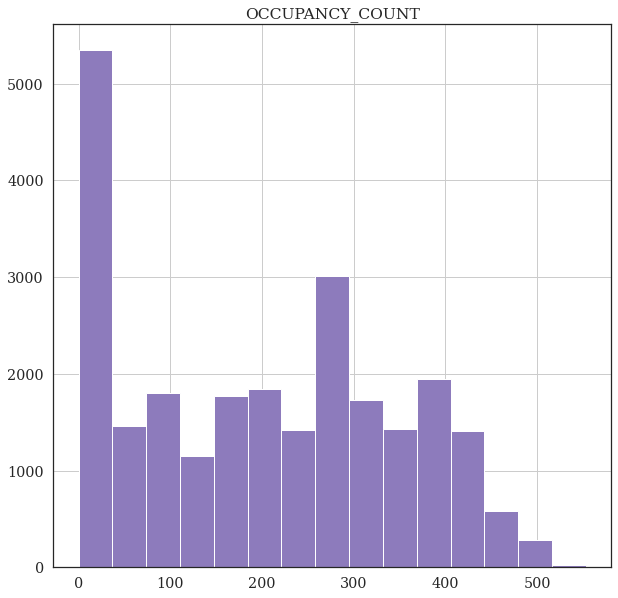

In [77]:
sns.set(style = 'white')
plt.rc('font', family='serif')


c_background = '#FFFFFF'

colours = ['#8D7BBC', '#60A561', '#EDAE49', '#D1495B', '#1E3231', '#00798C', '#30638E', '#003D5B' ]

#histogram of distributions
sns.set(style = 'white', font_scale=1.3)
plt.rc('font', family='serif')

df[numeric_variables].hist(bins = 15,
                           color = colours[0],
                           figsize = (10,10),
                           )
plt.show()

<AxesSubplot:>

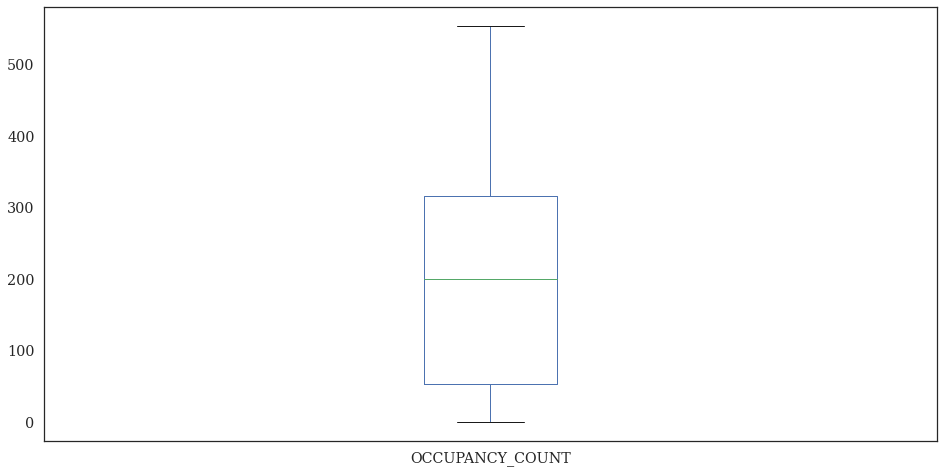

In [78]:
df[numeric_variables].plot(kind='box', figsize=[16,8])

In [79]:
df['OCCUPANCY_COUNT'].describe()

count    25208.000000
mean       203.674825
std        143.644248
min          0.000000
25%         52.000000
50%        200.000000
75%        316.000000
max        553.000000
Name: OCCUPANCY_COUNT, dtype: float64

# *Normality*
Identify the outliers
 

In [45]:
def normality_numeric_variables(col):
    stats.probplot(df[col], plot=plt)
    plt.xlabel('Probability diagram (normal) of variable {}'.format(col))
    plt.show()

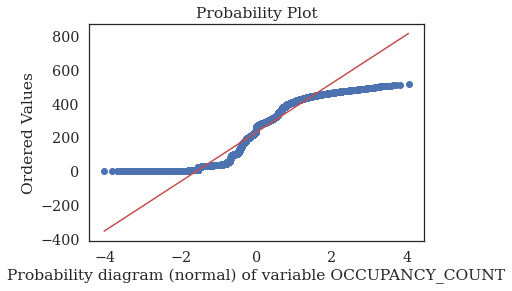

In [46]:
normality_numeric_variables('OCCUPANCY_COUNT')

In [47]:
for num_col in numeric_variables:
    _, pval = stats.normaltest(df[num_col])
    if(pval < 0.05):
        print("Columna {} does not follow a normal distribution".format(num_col))

Columna OCCUPANCY_COUNT does not follow a normal distribution


# Category variables


In [48]:
all_variables = df.columns.values
categorical_variables = np.setdiff1d( all_variables, numeric_variables )
categorical_variables

array([], dtype=object)

In [49]:
for i in df[categorical_variables].columns.values:
    print("Values of ", i,'\n')
    print(df[i].value_counts())
    print('\n\n')

In [50]:
def categoric_variable_distribution(col):
    df[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()
    plt.show()

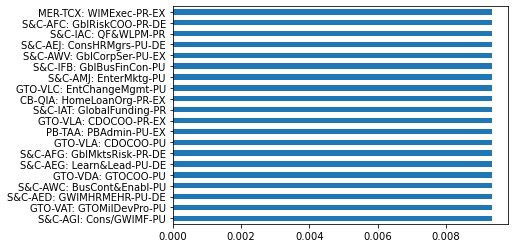

In [16]:
categoric_variable_distribution('SITE')

# Variations by one unit time (day)

In [34]:
displaced = df['OCCUPANCY_COUNT'].shift(1)
displaced[:5]

DATES
2018-01-01 01:00:00    NaN
2018-01-01 02:00:00    5.0
2018-01-01 03:00:00    1.0
2018-01-01 04:00:00    5.0
2018-01-01 05:00:00    2.0
Name: OCCUPANCY_COUNT, dtype: float64

In [35]:
df['var_diaria']=df['OCCUPANCY_COUNT'].pct_change()
df['var_diaria'][:5]

DATES
2018-01-01 01:00:00    NaN
2018-01-01 02:00:00   -0.8
2018-01-01 03:00:00    4.0
2018-01-01 04:00:00   -0.6
2018-01-01 05:00:00    4.0
Name: var_diaria, dtype: float64

## Applying the Hodrick-Prescott filter to separate in trend and cyclic component.


In [36]:
oc_ciclo, oc_tend = sm.tsa.filters.hpfilter(df['OCCUPANCY_COUNT'])
df['oc_tend'] = oc_tend

In [37]:
# # calculating daily accumulated perfomrance
daily_performance=(1 + df['OCCUPANCY_COUNT'].pct_change()).cumprod()
df['dai_performance'] = daily_performance
df['dai_performance']

DATES
2018-01-01 01:00:00    NaN
2018-01-01 02:00:00    0.2
2018-01-01 03:00:00    1.0
2018-01-01 04:00:00    0.4
2018-01-01 05:00:00    2.0
                      ... 
2020-12-31 19:00:00    NaN
2020-12-31 20:00:00    NaN
2020-12-31 21:00:00    NaN
2020-12-31 22:00:00    NaN
2020-12-31 23:00:00    NaN
Name: dai_performance, Length: 25208, dtype: float64

# Zeros,nan,null after calculations

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25208 entries, 2018-01-01 01:00:00 to 2020-12-31 23:00:00
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OCCUPANCY_COUNT  25208 non-null  int64  
 1   var_diaria       25041 non-null  float64
 2   oc_tend          25208 non-null  float64
 3   dai_performance  115 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 1.5+ MB


In [39]:
df.var_diaria[df.var_diaria==0].count()

439

In [40]:
df.oc_tend[df.oc_tend==0].count()

0

In [41]:
df.isna().sum()

OCCUPANCY_COUNT        0
var_diaria           167
oc_tend                0
dai_performance    25093
dtype: int64

In [42]:
df.isnull().sum()

OCCUPANCY_COUNT        0
var_diaria           167
oc_tend                0
dai_performance    25093
dtype: int64

# Visualizating

## Define date

In [43]:
df.OCCUPANCY_COUNT[df.OCCUPANCY_COUNT<10]['2020-03':'2020-09'].count()

250

In [44]:
date='2020-03:2020-09'

## Occupancy_count plot


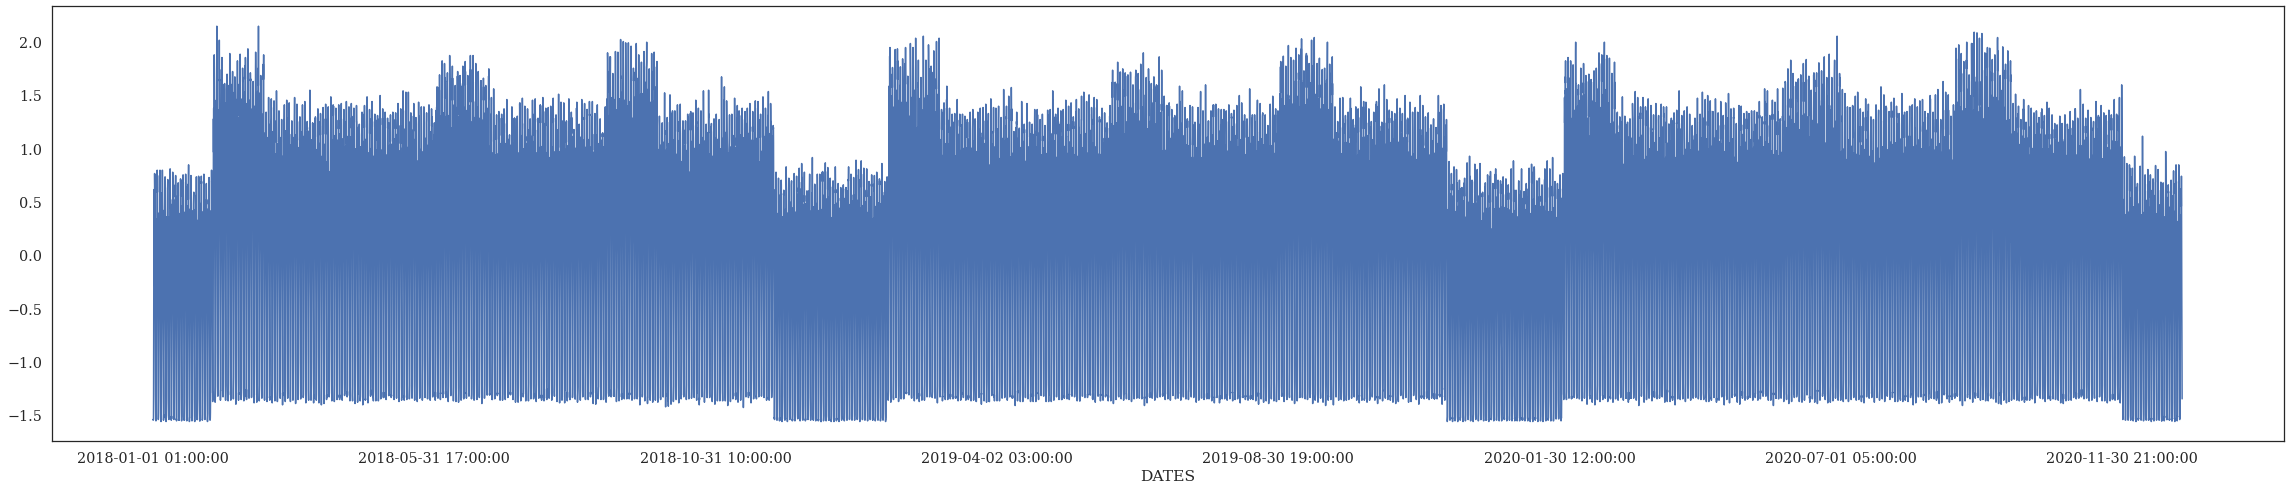

In [174]:
# graficando occupancy_count
plot = df['OCCUPANCY_COUNT'].plot(figsize=(40, 8))
plt.show()

In [52]:
df['OCCUPANCY_COUNT']['2020-05':'2020-07']

DATES
2020-05-01 01:00:00     38
2020-05-01 02:00:00     32
2020-05-01 03:00:00     28
2020-05-01 04:00:00     39
2020-05-01 05:00:00     53
                      ... 
2020-06-30 19:00:00    294
2020-06-30 20:00:00    269
2020-06-30 21:00:00    204
2020-06-30 22:00:00    165
2020-06-30 23:00:00     94
Name: OCCUPANCY_COUNT, Length: 1403, dtype: int64

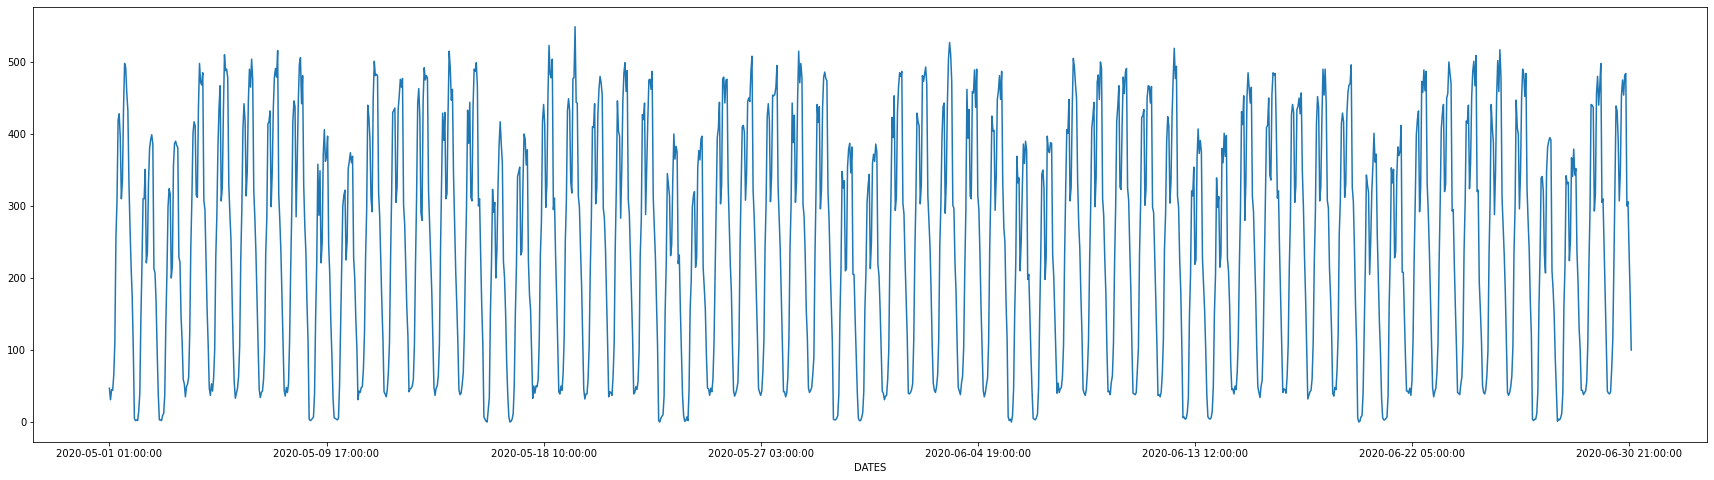

In [9]:
plot2 = df['OCCUPANCY_COUNT']['2020-05':'2020-07'].plot(figsize=(30, 8))
plt.show()

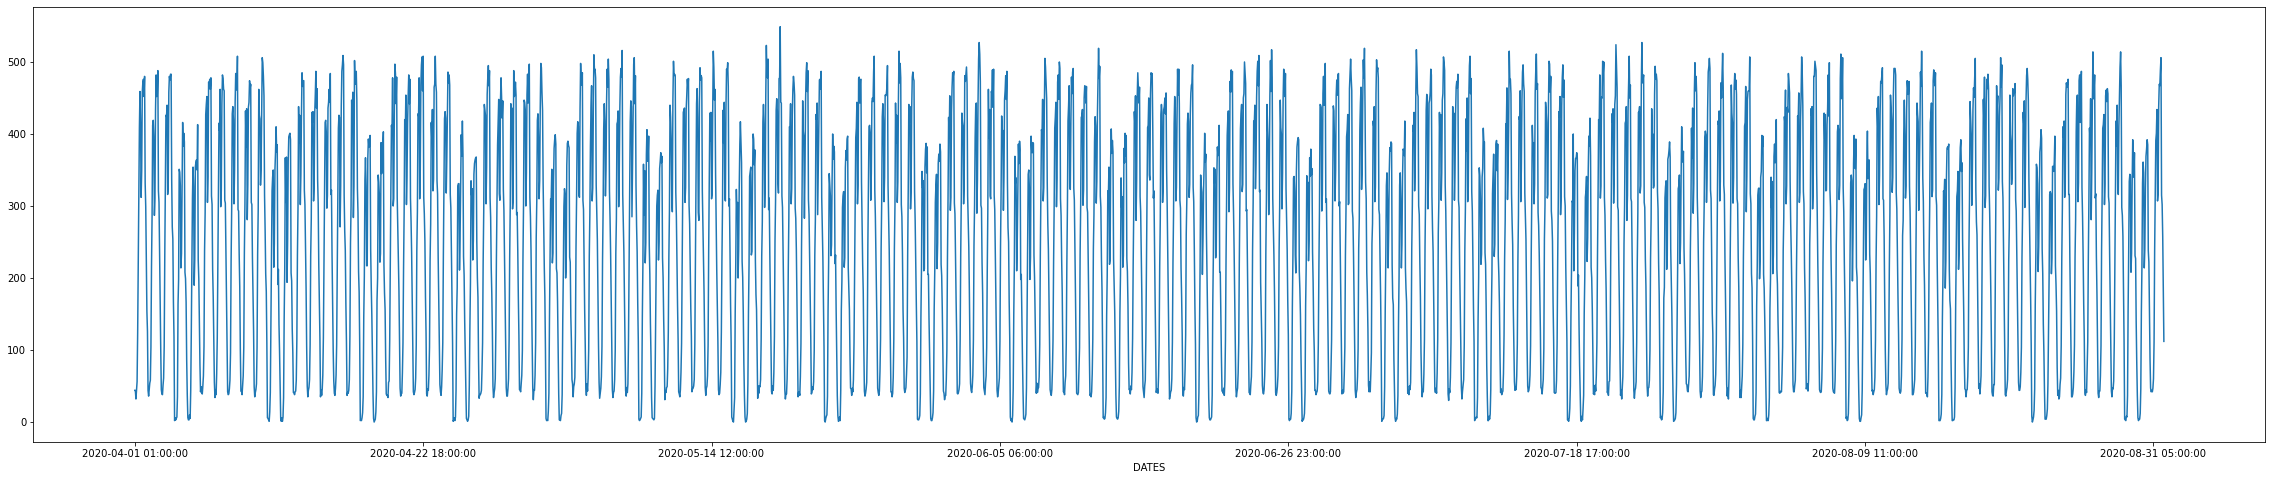

In [10]:
plot = df['OCCUPANCY_COUNT']['2020-04':'2020-09'].plot(figsize=(40, 8))
plt.show()

In [11]:
# graficando la variacion del precio real con la tendencia.
#df[['OCCUPANCY_COUNT','oc_tend']].plot(figsize=(10, 8), fontsize=12)
#df[date][['occupancy_count','oc_tend']].plot(figsize=(10, 8), fontsize=12);
#wft[['Adj Close', 'tend']].plot(figsize=(10, 8), fontsize=12);
#legend = plt.legend()
#legend.prop.set_size(14);

In [12]:
df['var_diaria'].plot(figsize=(30, 8))

KeyError: 'var_diaria'

## Base 3 per day

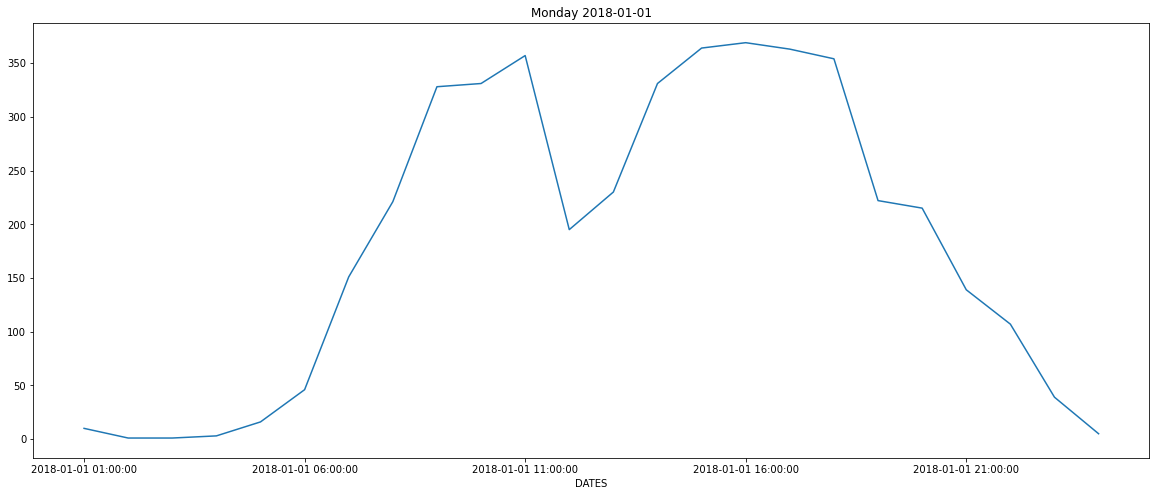

In [13]:
plot_monday = df.OCCUPANCY_COUNT['2018-01-01 01:00:00':'2018-01-02 01:00:00'].plot(figsize=(20, 8))
plt.title('Monday 2018-01-01')
plt.show()

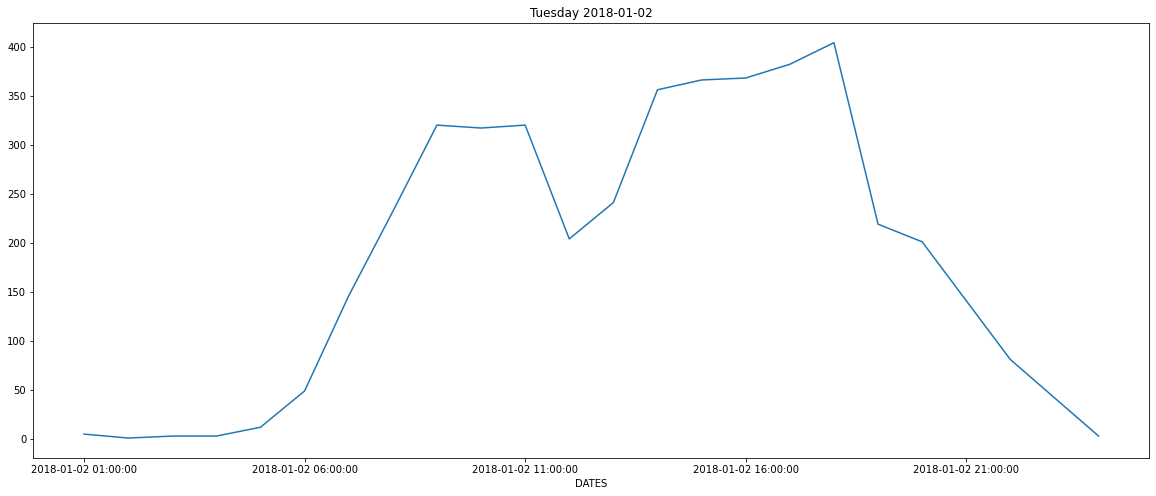

In [14]:
plot_tuesday = df.OCCUPANCY_COUNT['2018-01-02 01:00:00':'2018-01-03 01:00:00'].plot(figsize=(20, 8))
plt.title('Tuesday 2018-01-02')
plt.show()

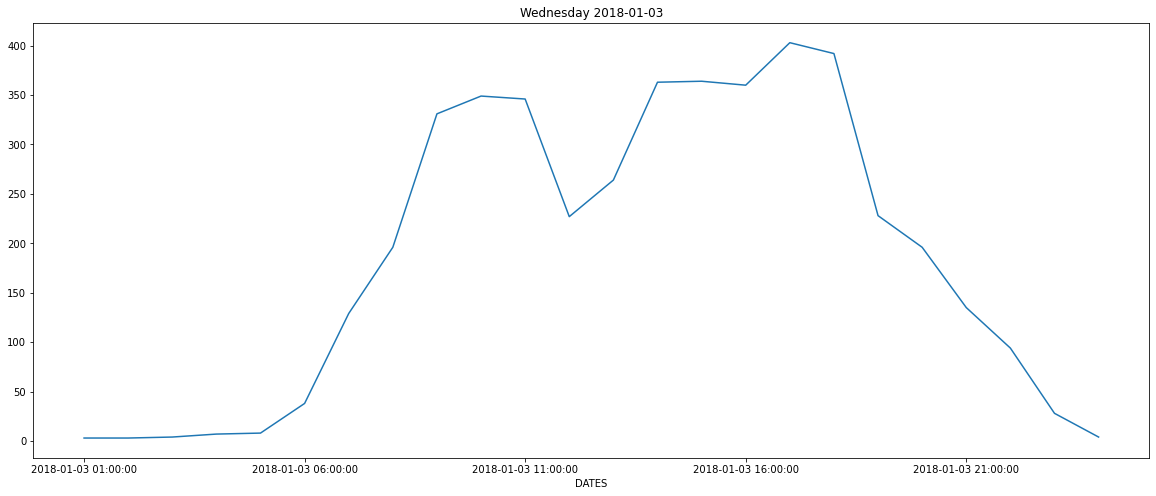

In [15]:
plot_wednesday = df.OCCUPANCY_COUNT['2018-01-03 01:00:00':'2018-01-04 01:00:00'].plot(figsize=(20, 8))
plt.title('Wednesday 2018-01-03')
plt.show()

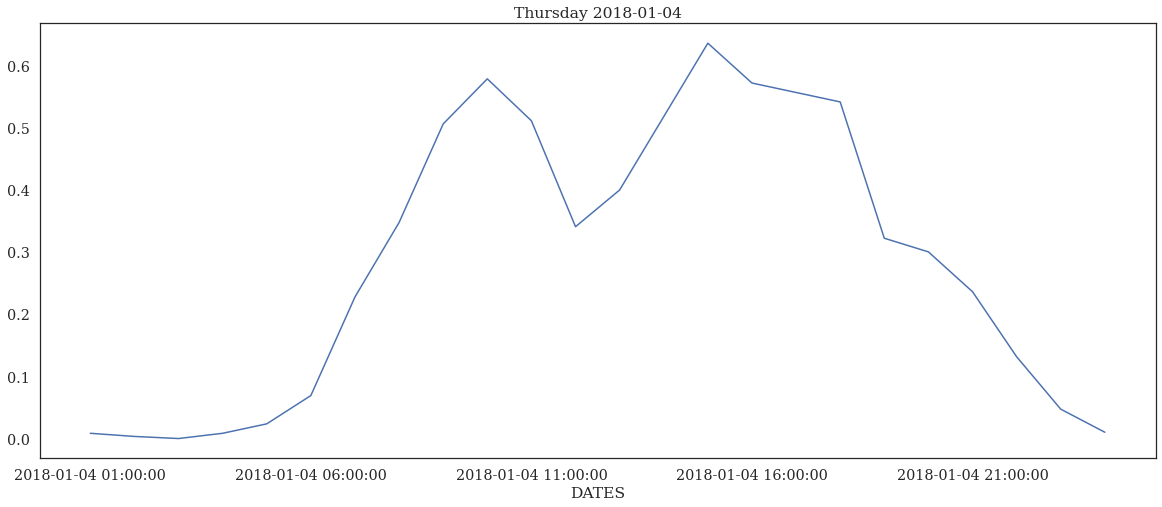

In [162]:
plot_thursday = df.OCCUPANCY_COUNT['2018-01-04 01:00:00':'2018-01-05 01:00:00'].plot(figsize=(20, 8))
plt.title('Thursday 2018-01-04')
plt.show()

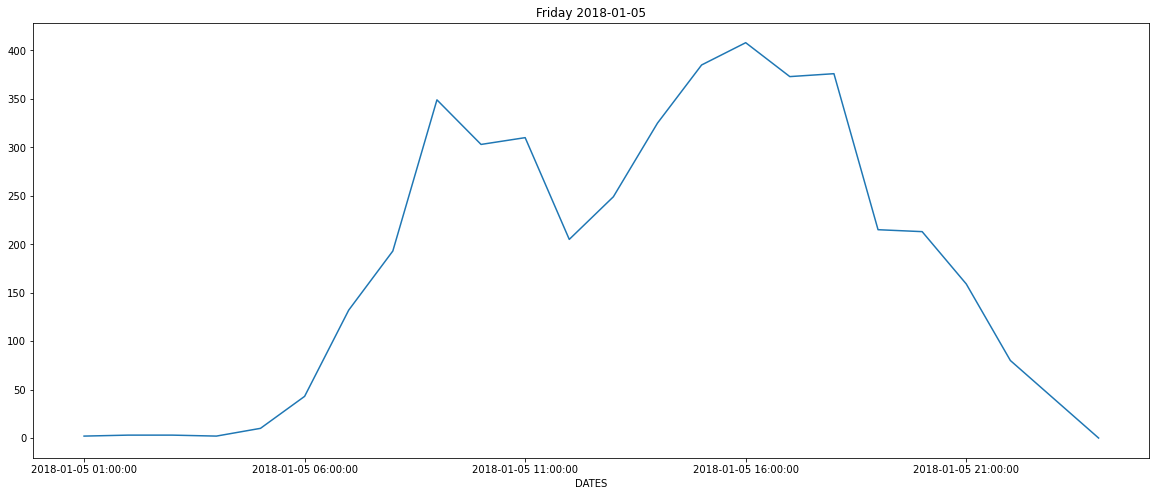

In [17]:
plot_friday = df.OCCUPANCY_COUNT['2018-01-05 01:00:00':'2018-01-06 01:00:00'].plot(figsize=(20, 8))
plt.title('Friday 2018-01-05')
plt.show()

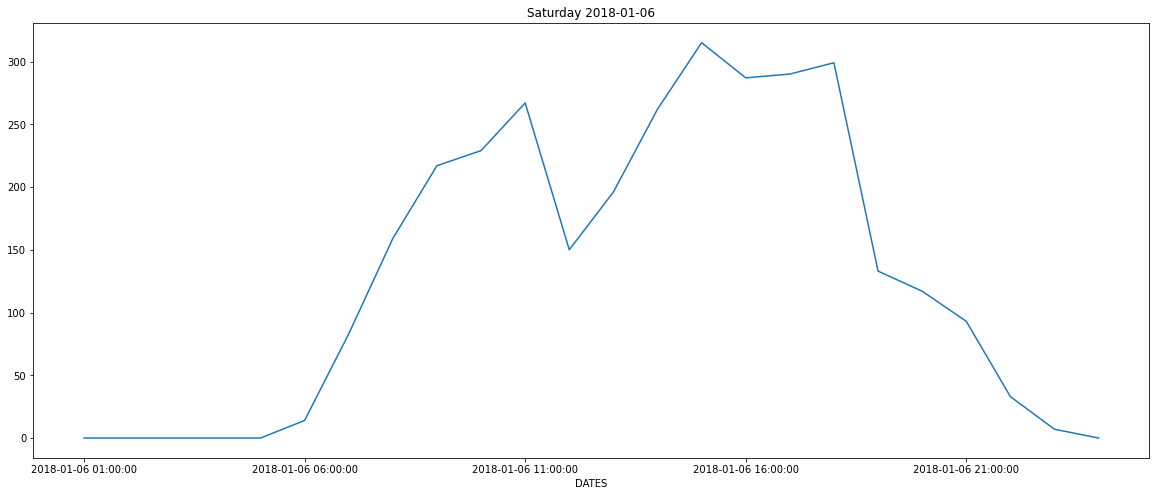

In [18]:
plot_saturday = df.OCCUPANCY_COUNT['2018-01-06 01:00:00':'2018-01-07 01:00:00'].plot(figsize=(20, 8))
plt.title('Saturday 2018-01-06')
plt.show()

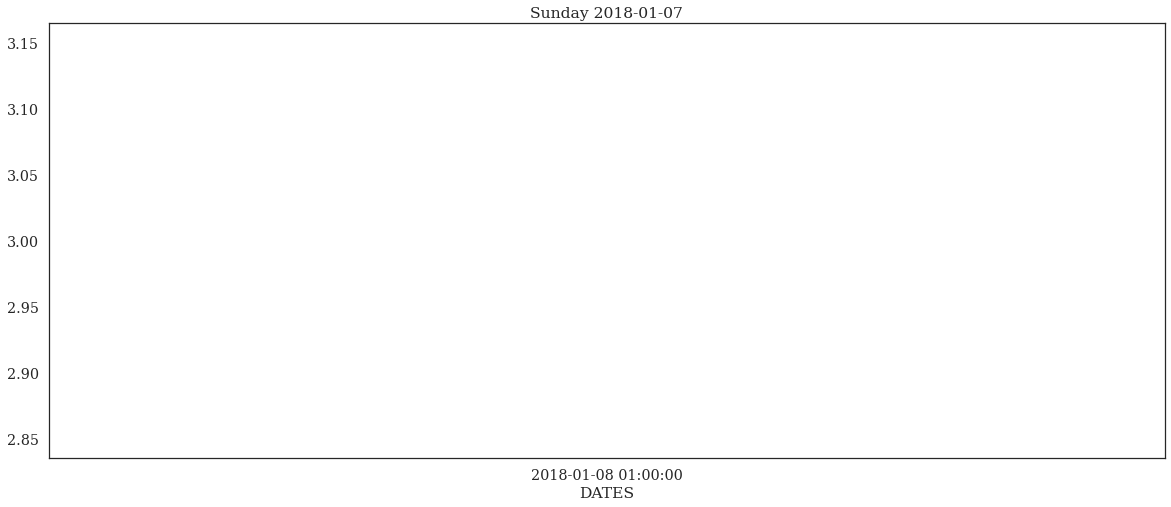

In [142]:
plot_sunday = df.OCCUPANCY_COUNT['2018-01-07 01:00:00':'2018-01-08 01:00:00'].plot(figsize=(20, 8))
plt.title('Sunday 2018-01-07')
plt.show()

## Base 3 week

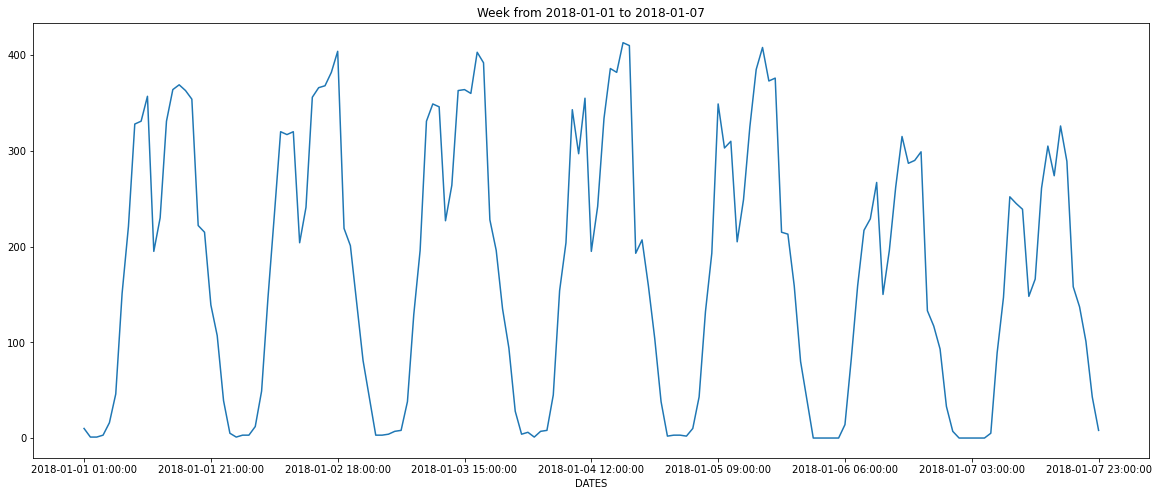

In [20]:
plot_week = df.OCCUPANCY_COUNT['2018-01-01':'2018-01-08'].plot(figsize=(20, 8), fontsize=10)
plt.title('Week from 2018-01-01 to 2018-01-07')
plt.show()

## Base 3 per month

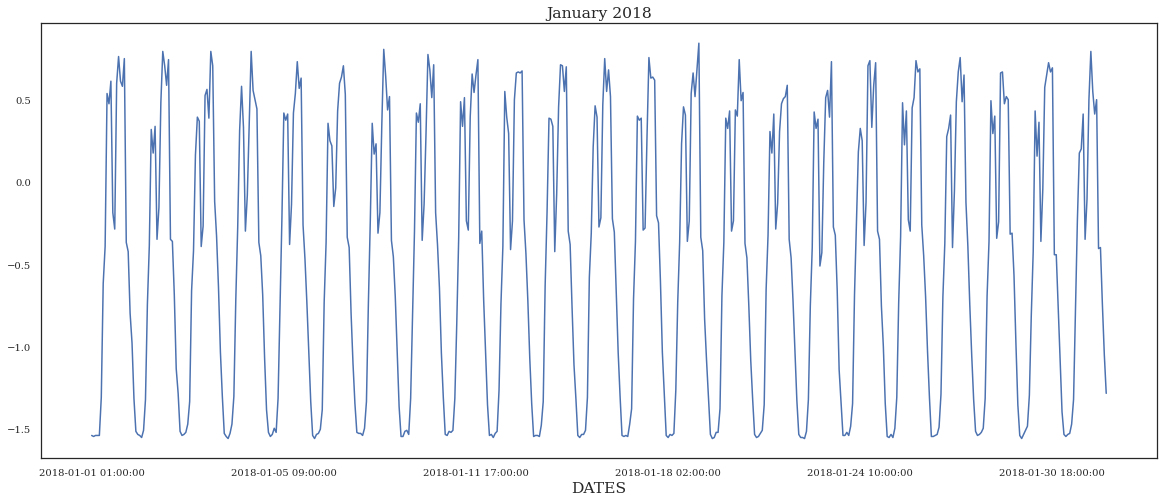

In [175]:
plot_month = df.OCCUPANCY_COUNT['2018-01-01':'2018-02-01'].plot(figsize=(20, 8), fontsize=10)
plt.title('January 2018')
plt.show()

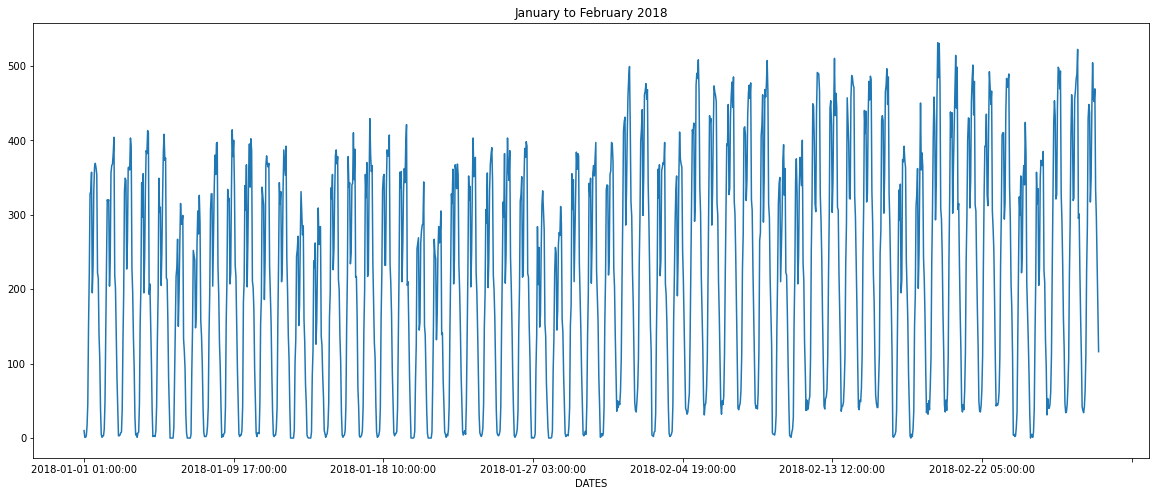

In [22]:
plot_month2 = df.OCCUPANCY_COUNT['2018-01-01':'2018-03-01'].plot(figsize=(20, 8), fontsize=10)
plt.title('January to February 2018')
plt.show()

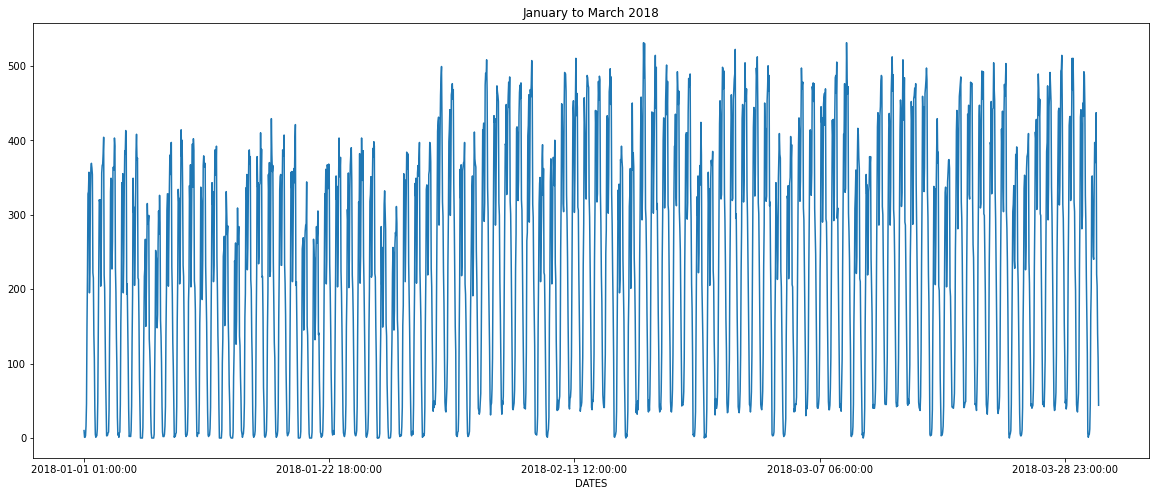

In [23]:
plot_month3 = df.OCCUPANCY_COUNT['2018-01-01':'2018-04-01'].plot(figsize=(20, 8), fontsize=10)
plt.title('January to March 2018')
plt.show()

## Plots per year

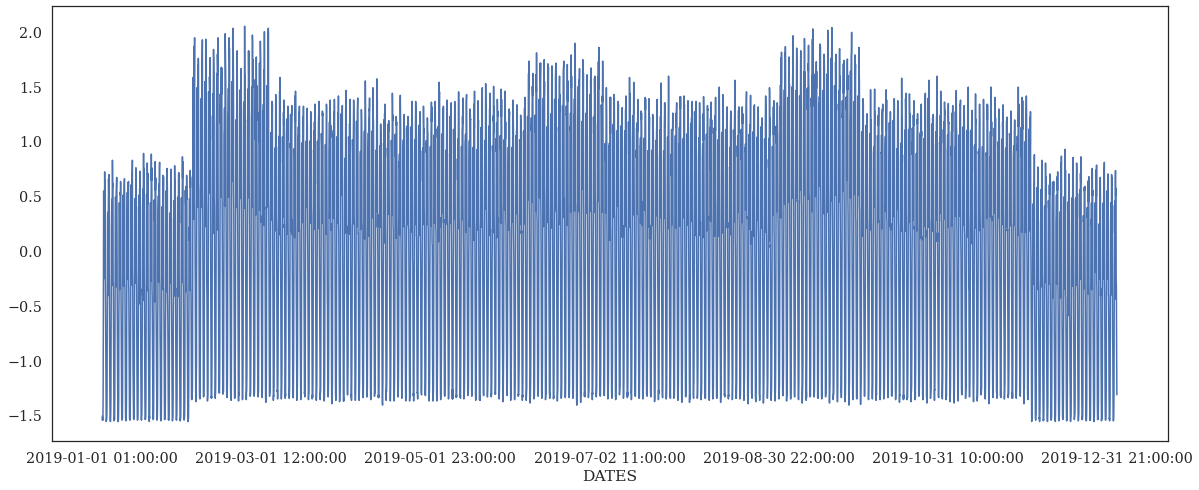

In [176]:
plot_year = df.OCCUPANCY_COUNT['2019-01':'2020-01'].plot(figsize=(20, 8))
plt.show()

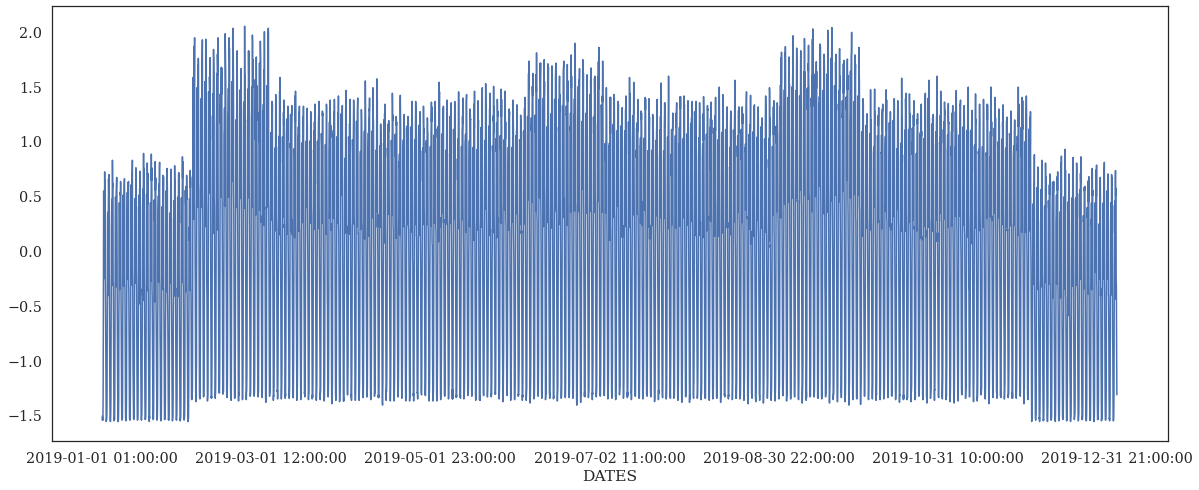

In [177]:
plot_year = df.OCCUPANCY_COUNT['2019-01':'2020-01'].plot(figsize=(20, 8))
plt.show()

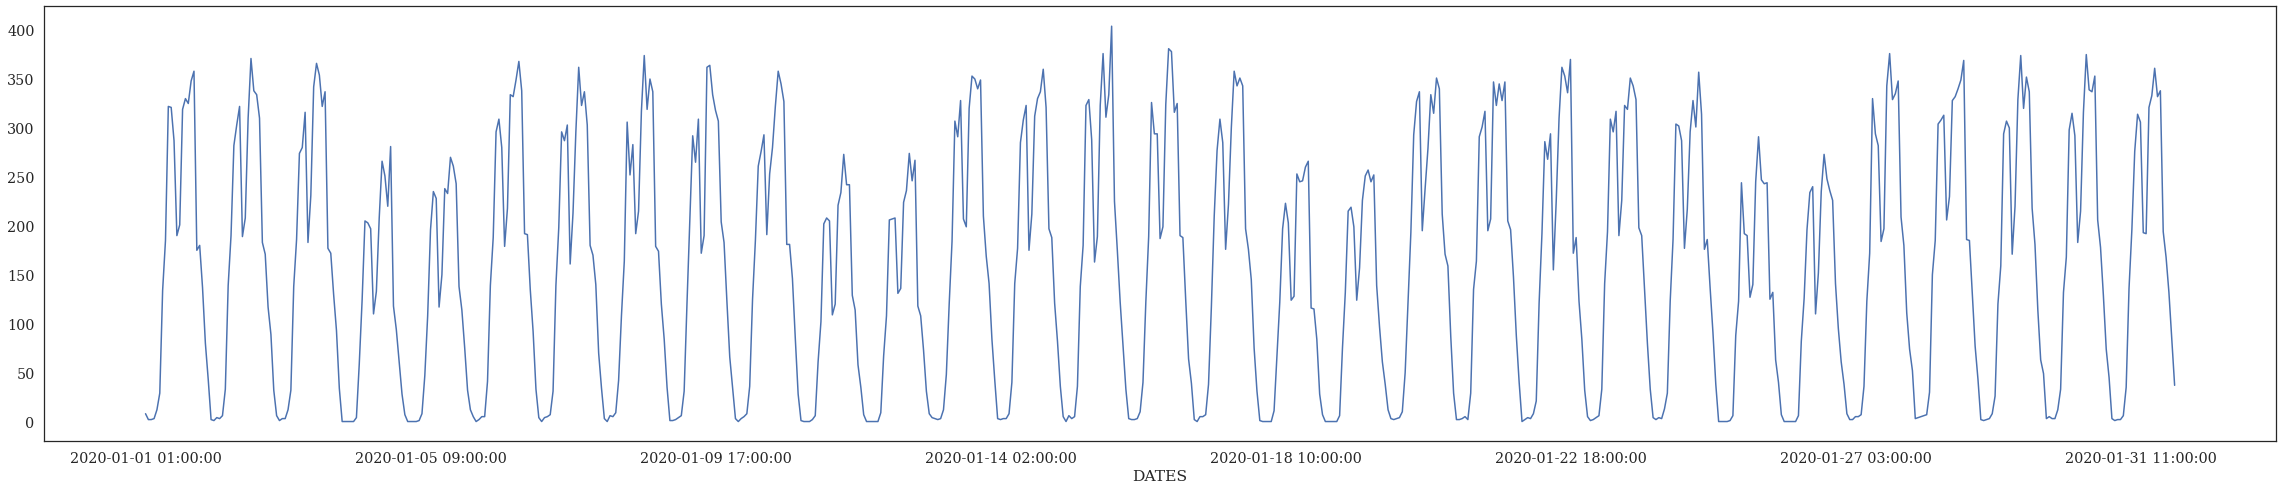

In [63]:
plot31 = df.OCCUPANCY_COUNT['2020-01':'2020-02'].plot(figsize=(40, 8))
plt.show()

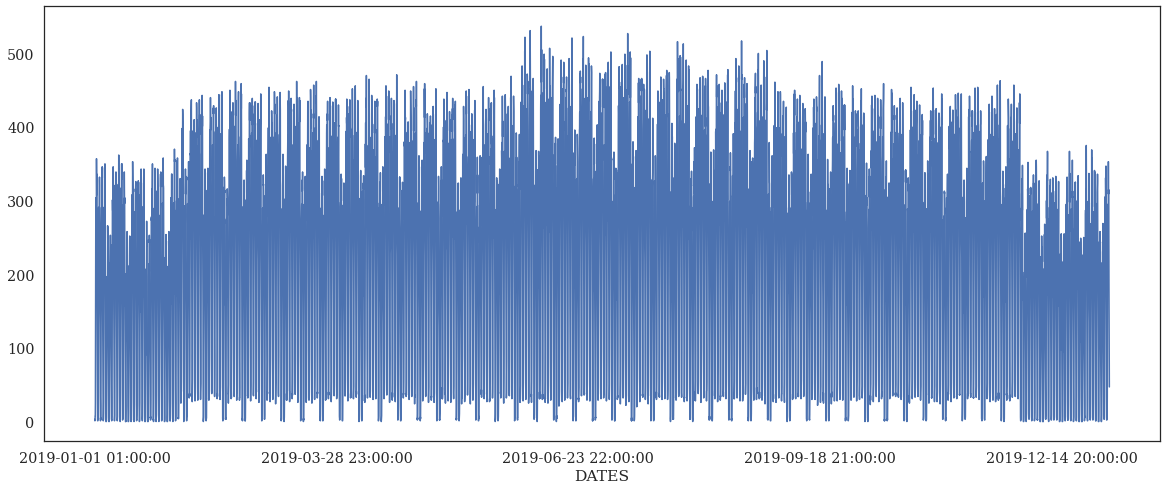

In [66]:
plot32 = df.OCCUPANCY_COUNT['2019-01':'2020-01'].plot(figsize=(20, 8))
plt.show()

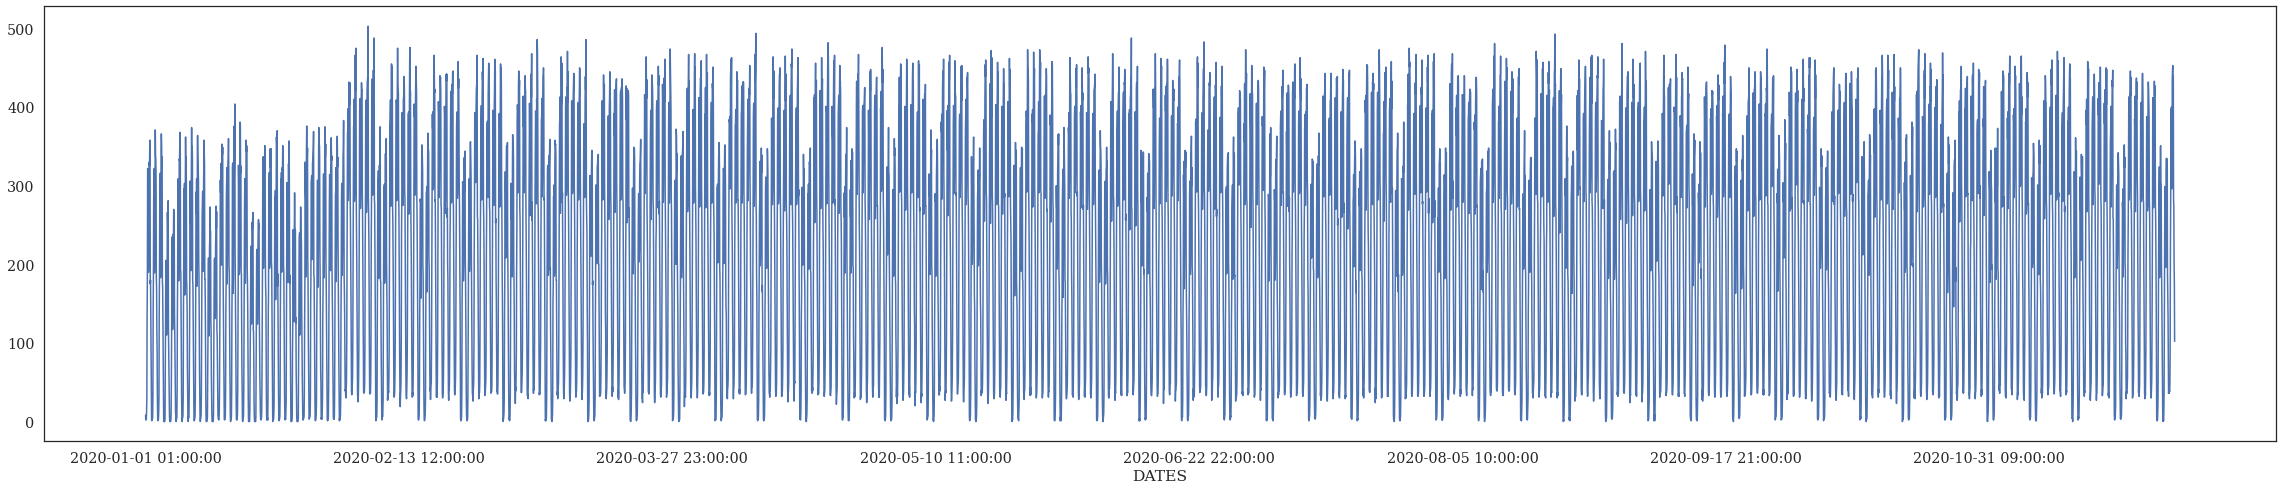

In [65]:
plot33 = df.OCCUPANCY_COUNT['2020-01':'2020-12'].plot(figsize=(40, 8))
plt.show()

## Database decomposition by year

Time series decomposition every 30 days per semester

In [ ]:
# Time series decomposition every 30 days per semester
from pylab import rcParams
rcParams['figure.figsize'] = 20, 9
descomposicion = sm.tsa.seasonal_decompose(df.OCCUPANCY_COUNT['2018-01':'2018-06'],model='additive', period=30)  
fig = descomposicion.plot()

C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


KeyboardInterrupt: 

In [ ]:
rcParams['figure.figsize'] = 20, 9
descomposicion = sm.tsa.seasonal_decompose(df.OCCUPANCY_COUNT['2018-06':'2018-12'],model='additive', period=30)  
fig = descomposicion.plot()

In [ ]:
rcParams['figure.figsize'] = 20, 9
descomposicion = sm.tsa.seasonal_decompose(df.OCCUPANCY_COUNT['2019-01':'2019-06'],model='additive', period=30)  
fig = descomposicion.plot()

In [ ]:
rcParams['figure.figsize'] = 20, 9
descomposicion = sm.tsa.seasonal_decompose(df.OCCUPANCY_COUNT['2019-06':'2019-12'],model='additive', period=30)  
fig = descomposicion.plot()

In [ ]:
rcParams['figure.figsize'] = 20, 9
descomposicion = sm.tsa.seasonal_decompose(df.OCCUPANCY_COUNT['2020-01':'2020-06'],model='additive', period=30)  
fig = descomposicion.plot()

In [ ]:
rcParams['figure.figsize'] = 20, 9
descomposicion = sm.tsa.seasonal_decompose(df.OCCUPANCY_COUNT['2020-06':'2020-12'],model='additive', period=30)  
fig = descomposicion.plot()

## Calculating moving averages every 5 days


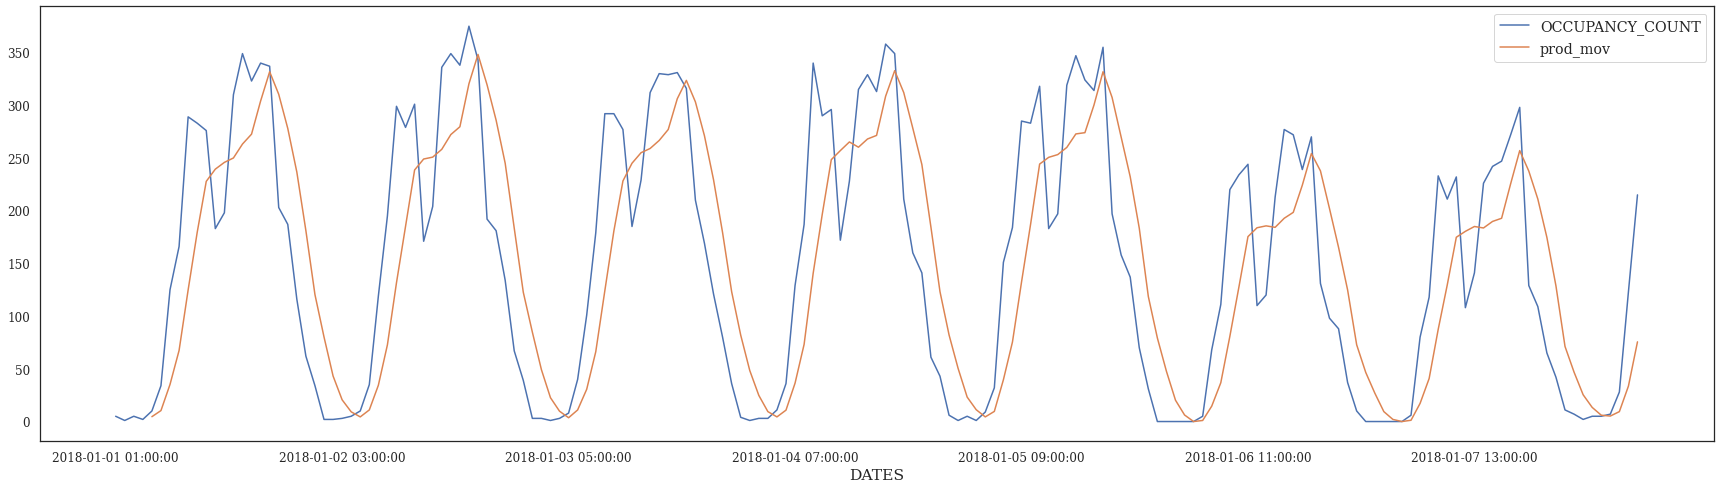

In [66]:
# Calculating moving averages every 5 days
df_ma=df['OCCUPANCY_COUNT'].rolling(5).mean()
df['prod_mov'] = df_ma
plot = df[:169][['OCCUPANCY_COUNT', 'prod_mov']].plot(figsize=(30, 8), fontsize=12)

## Time series (1 AND 2) decomposition every 30 days

In [ ]:
# Time series decomposition every 30 days
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

descomposicion = sm.tsa.seasonal_decompose(df['OCCUPANCY_COUNT'],
                                                  model='additive', period=30)  
fig = descomposicion.plot()

## Series decomposition 1

In [ ]:
# Time series decomposition every 30 days
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

descomposicion = sm.tsa.seasonal_decompose(df1['OCCUPANCY_COUNT'],
                                                  model='additive', period=30)  
fig = descomposicion.plot()

## Series descomposition 2

In [ ]:
# Time series decomposition every 30 days
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

descomposicion = sm.tsa.seasonal_decompose(df2['occupancy_count'],
                                                  model='additive', period=30)  
fig = descomposicion.plot()

In [ ]:
plot_week = df3.OCCUPANCY_COUNT['2018-01-01':'2018-01-07'].plot(figsize=(20, 8))